In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Using Visibility Graphs to Estimate the Hurst Parameter 

In [10]:
# dict for formatting in references 
# todo copy/paste these into cells
refs = {'lacasa2009':'[Lacasa et al. 2009](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:f660b4a6-9d04-463a-a31a-dd4a196baeae)'}

In this notebook, we have been introduced to the visibility graph and how such graphs can translate a time series into a network. Also, we have introduced the concept of long memory in time series and how this property can be measured with the Hurst parameter $H$. We have also used the `fbm` codebase to generate time series with different values of $H$. 

In {{refs['lacasa2009']}}, the authors introduce that visibility graphs can be used to esimate the Hurst parameter. In this section, we will replicate these results in Python.

The {{refs['lacasa2009']}} paper shows that the degree distribution of a visibility graph follows a power law, and that the exponent of the degree distribution approximates the Hurst parameter. 

To begin to explore this idea, we can generate FBM series that have different Hurst parameters and plot histograms of the corresponding visibility graphs. We'll use the same `fbm` project introduced earlier, the `build_visibility_graph` module and we will use `networkx` to create graph objects:

In [12]:
from src.fbm.fbm import FBM
from src import build_visibility_graph 
import networkx as nx

Now, we can generate three different FBM series with Hurst parameters 0.25, 0.5 and 0.75:

In [38]:
%%time
graphs = dict()
n = 1000

for hurst in [0.25, 0.5, 0.75]:
    y = FBM(n=n, hurst=hurst, length=1, method='daviesharte').fbm()
    x = list(range(len(y)))
    edges = build_visibility_graph.create_edges(x, y)
    graphs[hurst] = nx.from_edgelist(edges)

CPU times: user 31.7 s, sys: 7.97 ms, total: 31.7 s
Wall time: 31.7 s


Now we have a dict `graphs` with keys that are Hurst parameters and values that are time series with the same Hurst parameter. 

We now build a similar dictionary `degs`, where the values are instead arrays of node degrees:

In [39]:
get_degs = lambda g: [g.degree(x) for x in g.nodes]
degs = {k:get_degs(v) for k,v in graphs.items()}

...and create a simple histogram:

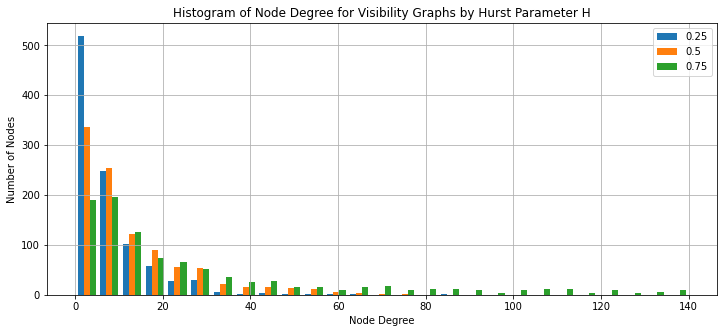

In [69]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bins = np.linspace(0,140,28)
ax.hist([degs[x] for x in degs.keys()], bins, label=list(degs.keys()))
t = 'Histogram of Node Degree for Visibility Graphs by Hurst Parameter H'
ax.set(title=t, xlabel='Node Degree', ylabel='Number of Nodes')
ax.legend()
ax.grid()